## Spam and Ham Classifier for Emails

In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [5]:
import pandas as pd

In [6]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length']=messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

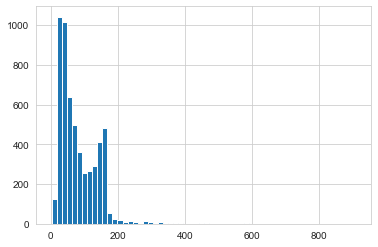

In [14]:
messages.length.hist(bins=60)

In [15]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000246A0E3E8C8>,
      dtype=object)

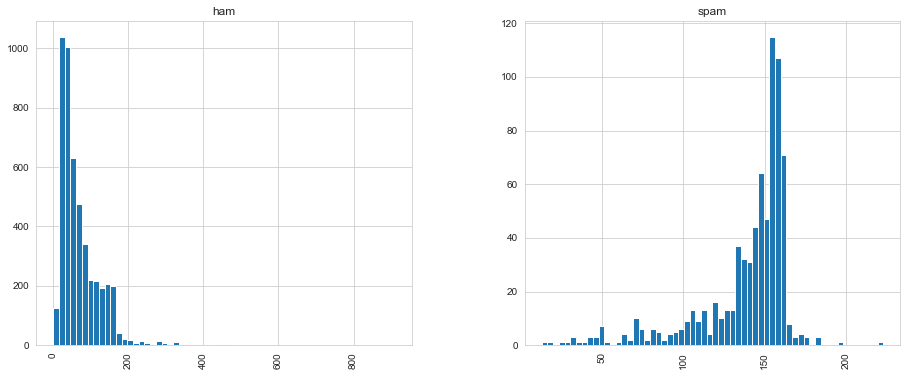

In [16]:
messages.hist(column='length',by='label',bins=60,figsize=(15,6))

In [26]:
tex='This is a Sample text and you will: #Notice alot of punctuations!'

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
nopunc=[char for char in tex if char not in string.punctuation]

In [39]:
nopunc=''.join(nopunc)

In [40]:
nopunc

'This is a Sample text and you will Notice alot of punctuations'

In [41]:
from nltk.corpus import stopwords

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
text=messages.iloc[0,1]
text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [58]:
text=[char for char in text if char not in string.punctuation]
text=''.join(text)
word=[word for word in text.split() if word.lower() not in stopwords.words('english')]

In [59]:
word

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [61]:
# Now wrap all these steps into a fenction

In [62]:
def clean_mess(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [64]:
messages['message'].head(5).apply(clean_mess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer=CountVectorizer(analyzer=clean_mess).fit(messages['message'])

In [67]:
print(len(bow_transformer.vocabulary_))

11425


In [69]:
mess4=messages['message'].iloc[3]

In [70]:
mess4

'U dun say so early hor... U c already then say...'

In [72]:
bow4=bow_transformer.transform([mess4])

In [75]:
print(bow4)
print('\n')
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


(1, 11425)


In [81]:
bow_transformer.get_feature_names()[4068]

'U'

In [82]:
messages_bow=bow_transformer.transform(messages['message'])

In [83]:
messages_bow.shape

(5572, 11425)

In [84]:
messages_bow.nnz

50548

In [85]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [93]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [96]:
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [99]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


In [102]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [107]:
spam_detect_model.predict(bow4)[0]

'ham'

In [109]:
spam_detect_model.predict(messages_bow)

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
msg_train, msg_test, label_train, label_test=train_test_split(messages.message,messages.label,test_size=0.3)

In [113]:
from sklearn.pipeline import Pipeline

In [115]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=clean_mess)),
    ('tidf',TfidfTransformer()),
     ('classifier',MultinomialNB())
])

In [116]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_mess at 0x00000246A5385A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [117]:
predictions=pipeline.predict(msg_test)

In [118]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1508
        spam       0.70      1.00      0.83       164

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672

